# Data Analysis Process
1. Problem Finding
2. Data Warnings
      - 2.1 Data Gathering (csv, xlsx, db, api)
      - 2.2 Data Assessing
      - 2.3 Data Preprocessing
3. EDA --> Exploratory data Analysis --> Visualise Data, Statiscal Methods
4. Reporting, colclusions, summary, Advisories
5. Dashboarding --> Power Bi and Tableau

In [36]:
# importing mojor libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

# addition libraries 
import warnings
warnings.filterwarnings('ignore')

In [37]:
# importing dataset
df = pd.read_csv('Magicbricks.csv')

# Data Assessing

In [38]:
df.head()

,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price
0,950.0,2,2.0,Furnished,Karol Bagh,Central Delhi,"DDA MIG Flats Prasad Nagar Phase 2, Prasad Nag...",1.0,Ready_to_move,Resale,Apartment,8761.0,12500000
1,535.0,2,1.0,Furnished,Karol Bagh,Central Delhi,"Dev Nagar, Karol Bagh",1.0,Ready_to_move,New_Property,Apartment,7290.0,3900000
2,1280.0,3,3.0,Furnished,Karol Bagh,Central Delhi,Karol Bagh,2.0,Ready_to_move,Resale,Builder_Floor,14092.0,15000000
3,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,22222.0,25000000
4,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,22222.0,25000000


In [39]:
# shape
df.shape

(1214, 13)

## 📊 Data Card: Magicbricks Property Listings (Sample)

### 1. Dataset Overview

* **Dataset Name:** Magicbricks Property Listings – Sample
* **Source:** Magicbricks (Indian real estate listing platform)
* **Type:** Structured tabular data
* **Domain:** Real Estate / Housing
* **Geographic Coverage:** Central Delhi, India
* **Purpose:**

  * Property price analysis
  * Real estate market insights
  * Predictive modeling (e.g., price estimation)
  * Academic or demonstration use

---

### 2. Data Description

Each row represents a **single residential property listing**.

| Column Name | Description                                       | Data Type   |
| ----------- | ------------------------------------------------- | ----------- |
| Area        | Super built-up area of the property (in sq. ft.)  | Float       |
| BHK         | Number of bedrooms                                | Integer     |
| Bathroom    | Number of bathrooms                               | Float       |
| Furnishing  | Furnishing status (e.g., Furnished)               | Categorical |
| Location    | Broad locality / area name                        | Categorical |
| District    | Administrative district                           | Categorical |
| Locality    | Detailed address or society name                  | Text        |
| Parking     | Number of parking spaces                          | Float       |
| Status      | Construction status (Ready to move, Almost ready) | Categorical |
| Transaction | Sale type (Resale / New Property)                 | Categorical |
| Type        | Property type (Apartment / Builder Floor)         | Categorical |
| Per_Sqft    | Price per square foot (INR)                       | Float       |
| Price       | Total property price (INR)                        | Integer     |



# Types of Error
- **completeness**
- **Validity** --> dtypes(No. of children in float), Duplicacy issue(eg. patient_id),salary(-10000), age in negetive
- **Accuracy** --> body weight(13kg of adult), age 100
- **Inconsistency** --> New York City, NYC

# Types of Data 
- **Dirty Data** --> completeness, validity, accuracy, Inconsistency
- **Massy Data** --> Strutral issue --> Eg. pivot tables, sparsity issue

In [40]:
# seeking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1214 non-null   float64
 1   BHK          1214 non-null   int64  
 2   Bathroom     1212 non-null   float64
 3   Furnishing   1214 non-null   object 
 4   Location     1214 non-null   object 
 5   District     1214 non-null   object 
 6   Locality     1214 non-null   object 
 7   Parking      1182 non-null   float64
 8   Status       1214 non-null   object 
 9   Transaction  1214 non-null   object 
 10  Type         1209 non-null   object 
 11  Per_Sqft     973 non-null    float64
 12  Price        1214 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 123.4+ KB


# Point 
- The dataset contains null values, requiring proper handling.
- Bathroom and Parking are stored as float types, though they should be integers, indicating a data validity issue.
- There are 6 numerical features and 7 categorical (object-type) features in the dataset.
- Data cleaning and type conversion are needed before analysis.

In [41]:
df.describe()

,Area,BHK,Bathroom,Parking,Per_Sqft,Price
count,1214.000000,1214.000000,1212.000000,1182.000000,973.000000,1.214000e+03
mean,1451.850751,2.778418,2.523927,1.708122,15574.885920,2.079898e+07
std,1586.472855,0.946811,1.017723,5.717177,21574.389007,2.561308e+07
min,28.000000,1.000000,1.000000,1.000000,1259.000000,1.000000e+06
25%,800.000000,2.000000,2.000000,1.000000,6154.000000,5.600000e+06
50%,1150.000000,3.000000,2.000000,1.000000,10838.000000,1.400000e+07
75%,1620.000000,3.000000,3.000000,2.000000,17647.000000,2.500000e+07
max,24300.000000,10.000000,7.000000,114.000000,183333.000000,2.400000e+08


# Key Observations
- The dataset includes 1,214 residential property listings, with missing values primarily in the Bathroom, Parking, and Price per Sq. Ft. fields, indicating areas that may require data cleaning or imputation.

- The majority of listings are 2–3 BHK units, with an average built-up area of approximately 1,450 sq. ft., suggesting a market focus on mid-sized family homes.

- Most properties feature 2 bathrooms and 1 parking space, though the presence of unusually high values points to potential outliers or luxury developments.

- The median property price is around ₹1.4 crore, while prices span a wide range—from ₹10 lakh to ₹24 crore—highlighting strong market segmentation.

- Significant gaps between minimum and maximum values across price, area, and parking indicate high variability and the presence of outliers, which may influence summary statistics and should be handled carefully in further analysis.

In [42]:
# completness
df.isnull().sum().sum()

np.int64(280)

In [43]:
# percentage 
df.isnull().mean()*100

Area            0.000000
BHK             0.000000
Bathroom        0.164745
Furnishing      0.000000
Location        0.000000
District        0.000000
Locality        0.000000
Parking         2.635914
Status          0.000000
Transaction     0.000000
Type            0.411862
Per_Sqft       19.851730
Price           0.000000
dtype: float64

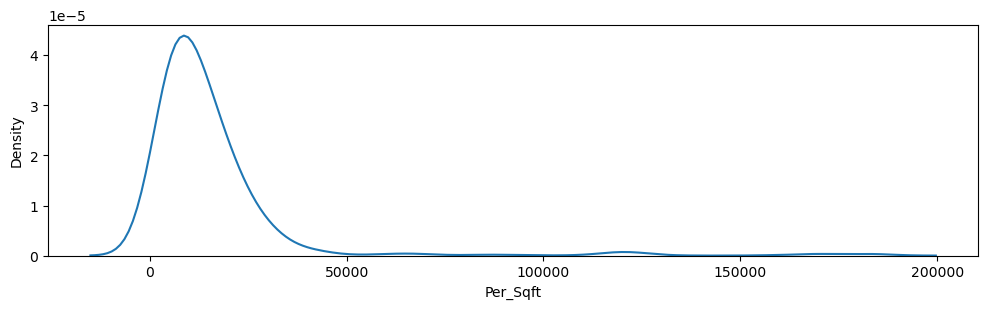

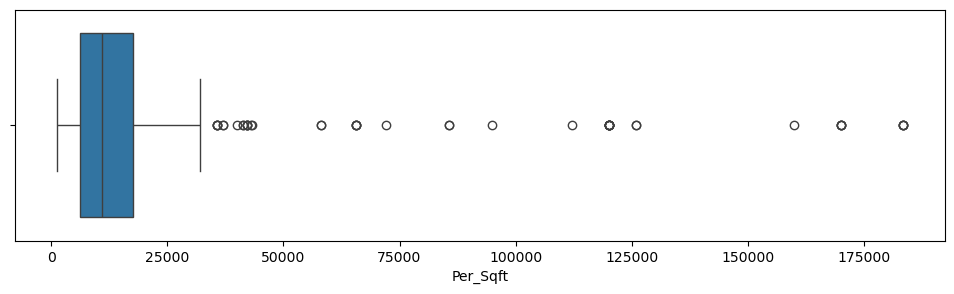

skewness 5.264871991245157


In [44]:
df.Per_Sqft.describe()
# visualisation
plt.figure(figsize=(12,3))
sns.kdeplot(data=df, x='Per_Sqft')
plt.show()
plt.figure(figsize=(12,3))
sns.boxplot(data=df,x='Per_Sqft')
plt.show()

print('skewness',df.Per_Sqft.skew())

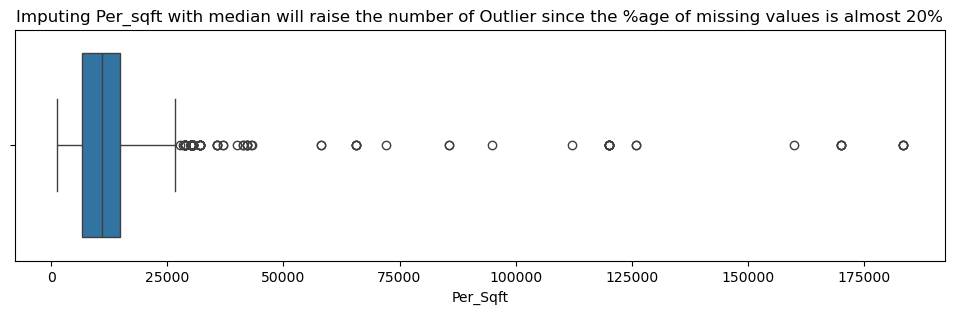

In [45]:
plt.figure(figsize=(12,3))
plt.title('Imputing Per_sqft with median will raise the number of Outlier since the %age of missing values is almost 20%')
sns.boxplot(x=df.Per_Sqft.fillna(df.Per_Sqft.median()))
plt.show()

In [46]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Location', 'District',
       'Locality', 'Parking', 'Status', 'Transaction', 'Type', 'Per_Sqft',
       'Price'],
      dtype='object')

In [47]:
# 'Area' --> 'Price'
# 'per_sqft' --> price/area
df.Per_Sqft = df.Per_Sqft.fillna(df.Price/df.Area)

In [48]:
df.Per_Sqft.isnull().sum()
# df.per_sqft is free from issue of completeness 

np.int64(0)

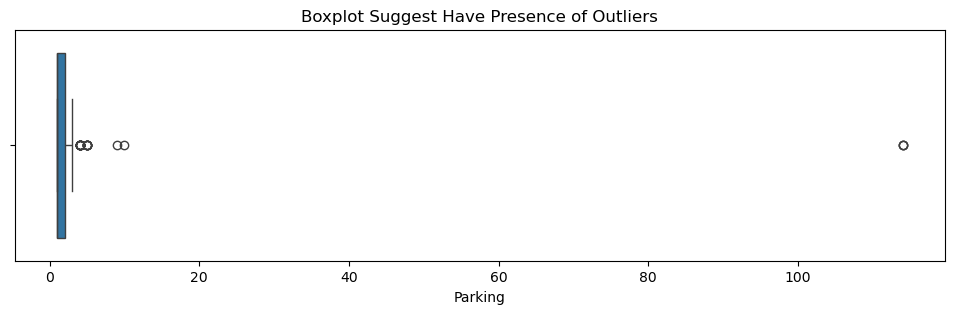

In [49]:
# outlier 
plt.figure(figsize=(12,3))
plt.title('Boxplot Suggest Have Presence of Outliers')
sns.boxplot(x=df.Parking)
plt.show()

In [50]:
df[df.Parking>100]
df.Parking = np.where(df.Parking>100,1,df.Parking)

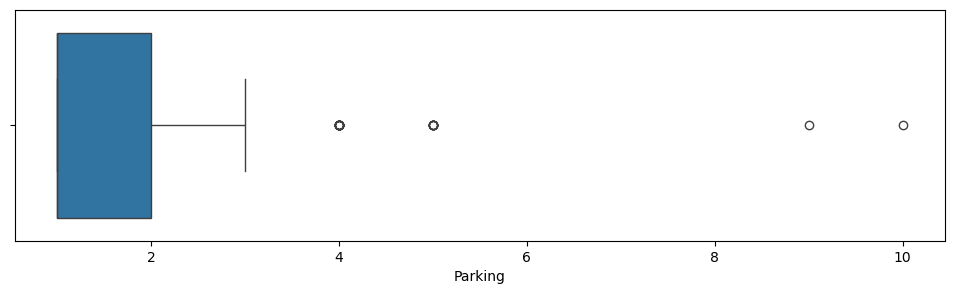

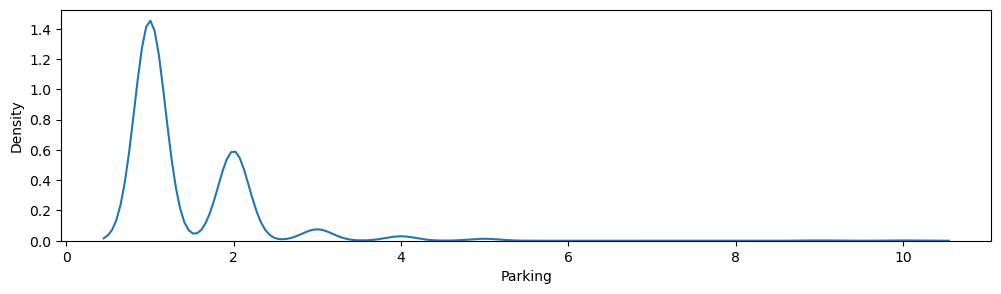

np.float64(3.5598955904673226)

In [51]:
plt.figure(figsize=(12,3))
sns.boxplot(x=df.Parking)
plt.show()
plt.figure(figsize=(12,3))
sns.kdeplot(x=df.Parking)
plt.show()
df.Parking.skew()

In [52]:
df.Parking = df.Parking.fillna(1)
df.Parking = df.Parking.astype(int)
df.Parking.sample(5)

84     2
226    2
880    1
727    1
509    1
Name: Parking, dtype: int64

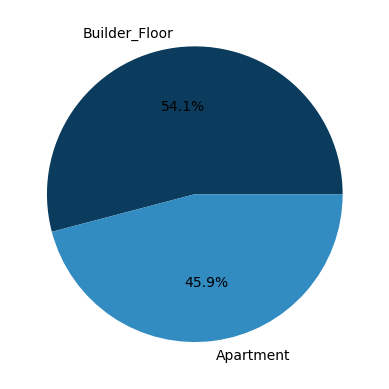

,Type,count
0,Builder_Floor,654
1,Apartment,555


In [53]:
df.isnull().sum()
colors = ["#0B3C5D", "#328CC1"]
temp = df.Type.value_counts().reset_index()
plt.pie(temp['count'],labels=temp.Type,autopct='%1.1f%%',colors=colors)
plt.show()
temp

In [54]:
df.Type.mode().values
df.Type.fillna('Builder_Floor',inplace=True)

In [55]:
df.isnull().sum().sum()

np.int64(2)

In [56]:
df.dropna(inplace=True)

In [57]:
df.shape

(1212, 13)

In [58]:
# numerical 
# categorical
df.columns
num = list(df.describe().columns)
cat = []

for i in df.columns:
    if i not in num:
        cat.append(i)

print('Numerical:\t', num)
print('Categorical:\t', cat)


Numerical:	 ['Area', 'BHK', 'Bathroom', 'Parking', 'Per_Sqft', 'Price']
Categorical:	 ['Furnishing', 'Location', 'District', 'Locality', 'Status', 'Transaction', 'Type']


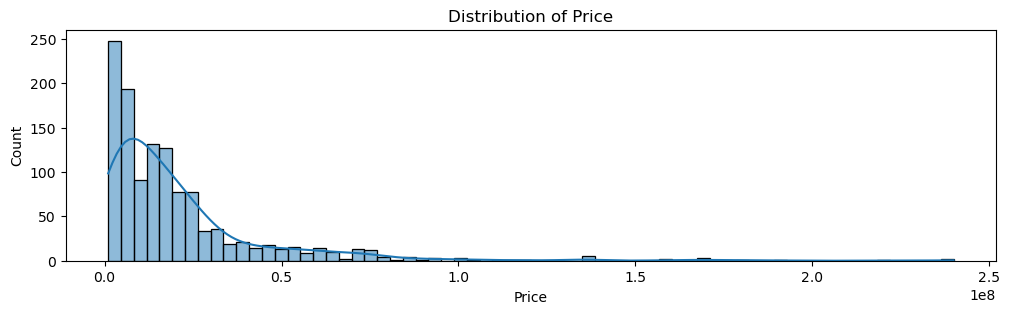

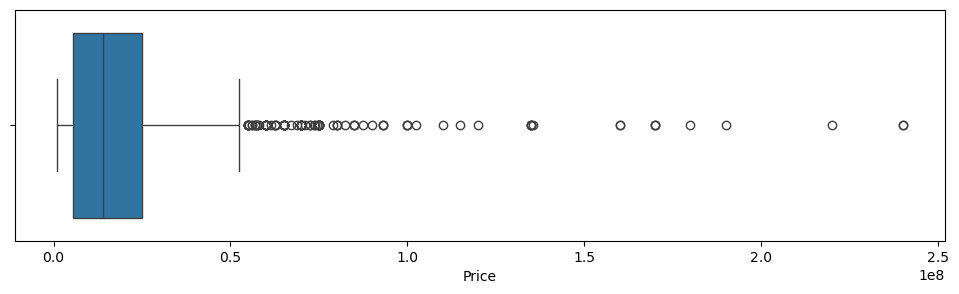

np.float64(8.099780784747038)

In [59]:
# univariable
# numberical columns

# distribution
plt.figure(figsize=(12,3))
plt.title('Distribution of Price')
sns.histplot(df.Price,kde=True)
plt.show()
plt.figure(figsize=(12,3))
sns.boxplot(x=df.Price)
plt.show()
df.Area.skew()

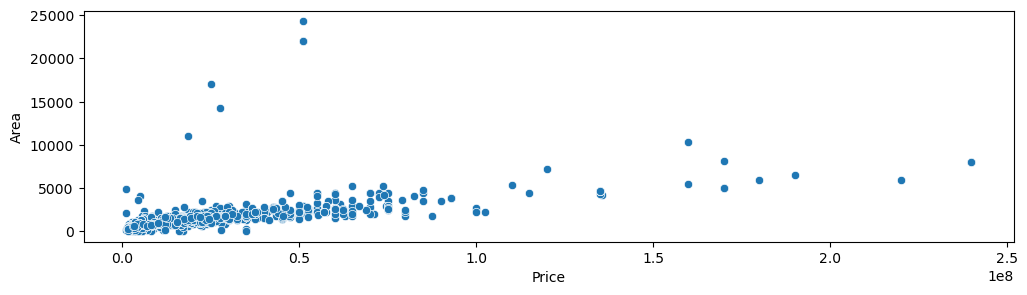

In [60]:
# bivariate analysis 
plt.figure(figsize=(12,3))
sns.scatterplot(data=df,x='Price',y='Area')
plt.show()

# Potential issue 
Area above 10k sqft is very affordable which is not possilble in Delhi like location

In [61]:
df[df.Area>10000]

,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price
429,22050.0,4,4.0,Semi-Furnished,Greater Kailash,South Delhi,Greater Kailash 1,2,Almost_ready,New_Property,Builder_Floor,30556.0,51000000
431,22050.0,4,4.0,Semi-Furnished,Greater Kailash,South Delhi,Greater Kailash 1,2,Almost_ready,New_Property,Builder_Floor,30556.0,51000000
515,10350.0,4,7.0,Semi-Furnished,Friends Colony,South Delhi,"Maharani Bagh, New Friends Colony",3,Ready_to_move,New_Property,Apartment,15459.0,160000000
603,24300.0,4,5.0,Semi-Furnished,Saket,South Delhi,Saket,2,Ready_to_move,Resale,Builder_Floor,12500.0,51000000
806,14220.0,3,3.0,Semi-Furnished,Paschim Vihar,West Delhi,Paschim Vihar Block B4,1,Ready_to_move,New_Property,Builder_Floor,10943.0,27500000
835,17010.0,3,3.0,Semi-Furnished,Punjabi Bagh,West Delhi,Punjabi Bagh West,2,Ready_to_move,Resale,Builder_Floor,15278.0,25000000
978,11050.0,3,3.0,Unfurnished,Chittaranjan Park,South Delhi,Chittaranjan Park,1,Ready_to_move,New_Property,Builder_Floor,12916.0,18500000


In [62]:
22050.0*30556.0

673759800.0

In [63]:
(673759800.0/51000000)/10

1.3210976470588236

In [64]:
df.Area = np.where(df.Area>10000,df.Area/10,df.Area)

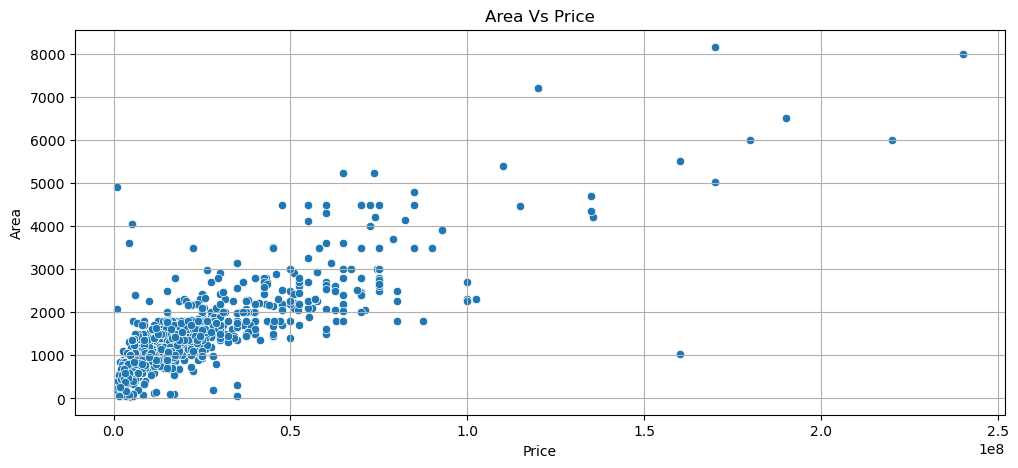

In [65]:
# bivariate analysis 
plt.figure(figsize=(12,5))
plt.title('Area Vs Price')
sns.scatterplot(data=df,x='Price',y='Area')
plt.grid()
plt.show()

In [66]:
# plotly 
px.scatter(df,x="Price",y="Area",hover_data=["Area","Location","Price"],height=500,color='Price',title='Area Vs Price')

# Exploratory Analysis

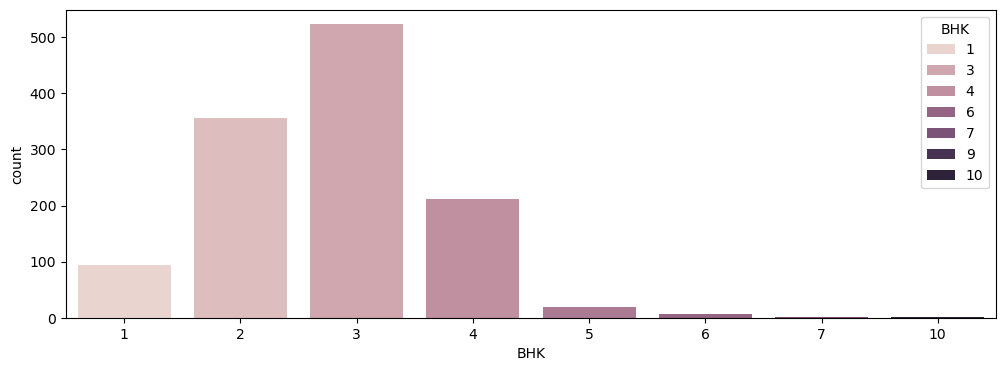

In [67]:
# univeriate analysis 
num
# BHK
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='BHK',hue='BHK')
temp = df.BHK.value_counts().reset_index()
temp
px.pie(temp,names='BHK',values='count',color_discrete_sequence=px.colors.sequential.Blues,height=400,title='Distribution of BHK')
# feature engg --> 5,6,7,10 --> 4+ BHK Enteries

- 3 BHK apartment have higher number of listing on MagicBricks including strong demand and builder preference
- 2 BHK units follow, driven by affordability and suitability for smaller or nuclear families
- 4 BHK and 1 BHK configuration show moderate to low

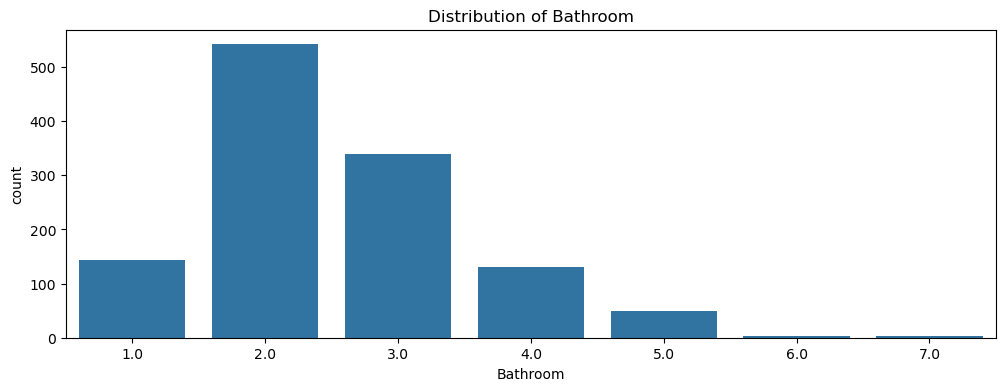

In [68]:
df.Bathroom.value_counts()
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='Bathroom')
plt.title('Distribution of Bathroom')
plt.show()

- Descriptive Statistics: Summarizing key variables such as price, area, location, and number of bathrooms.
- Visualizations: Bar charts, scatter plots, and distribution graphs to uncover trends and patterns in housing data.
- Market Insights: Identifying dominant property configurations, pricing trends, and regional preferences.
- Data Cleaning & Preparation: Handling missing values, outliers, and formatting for analytical clarity.

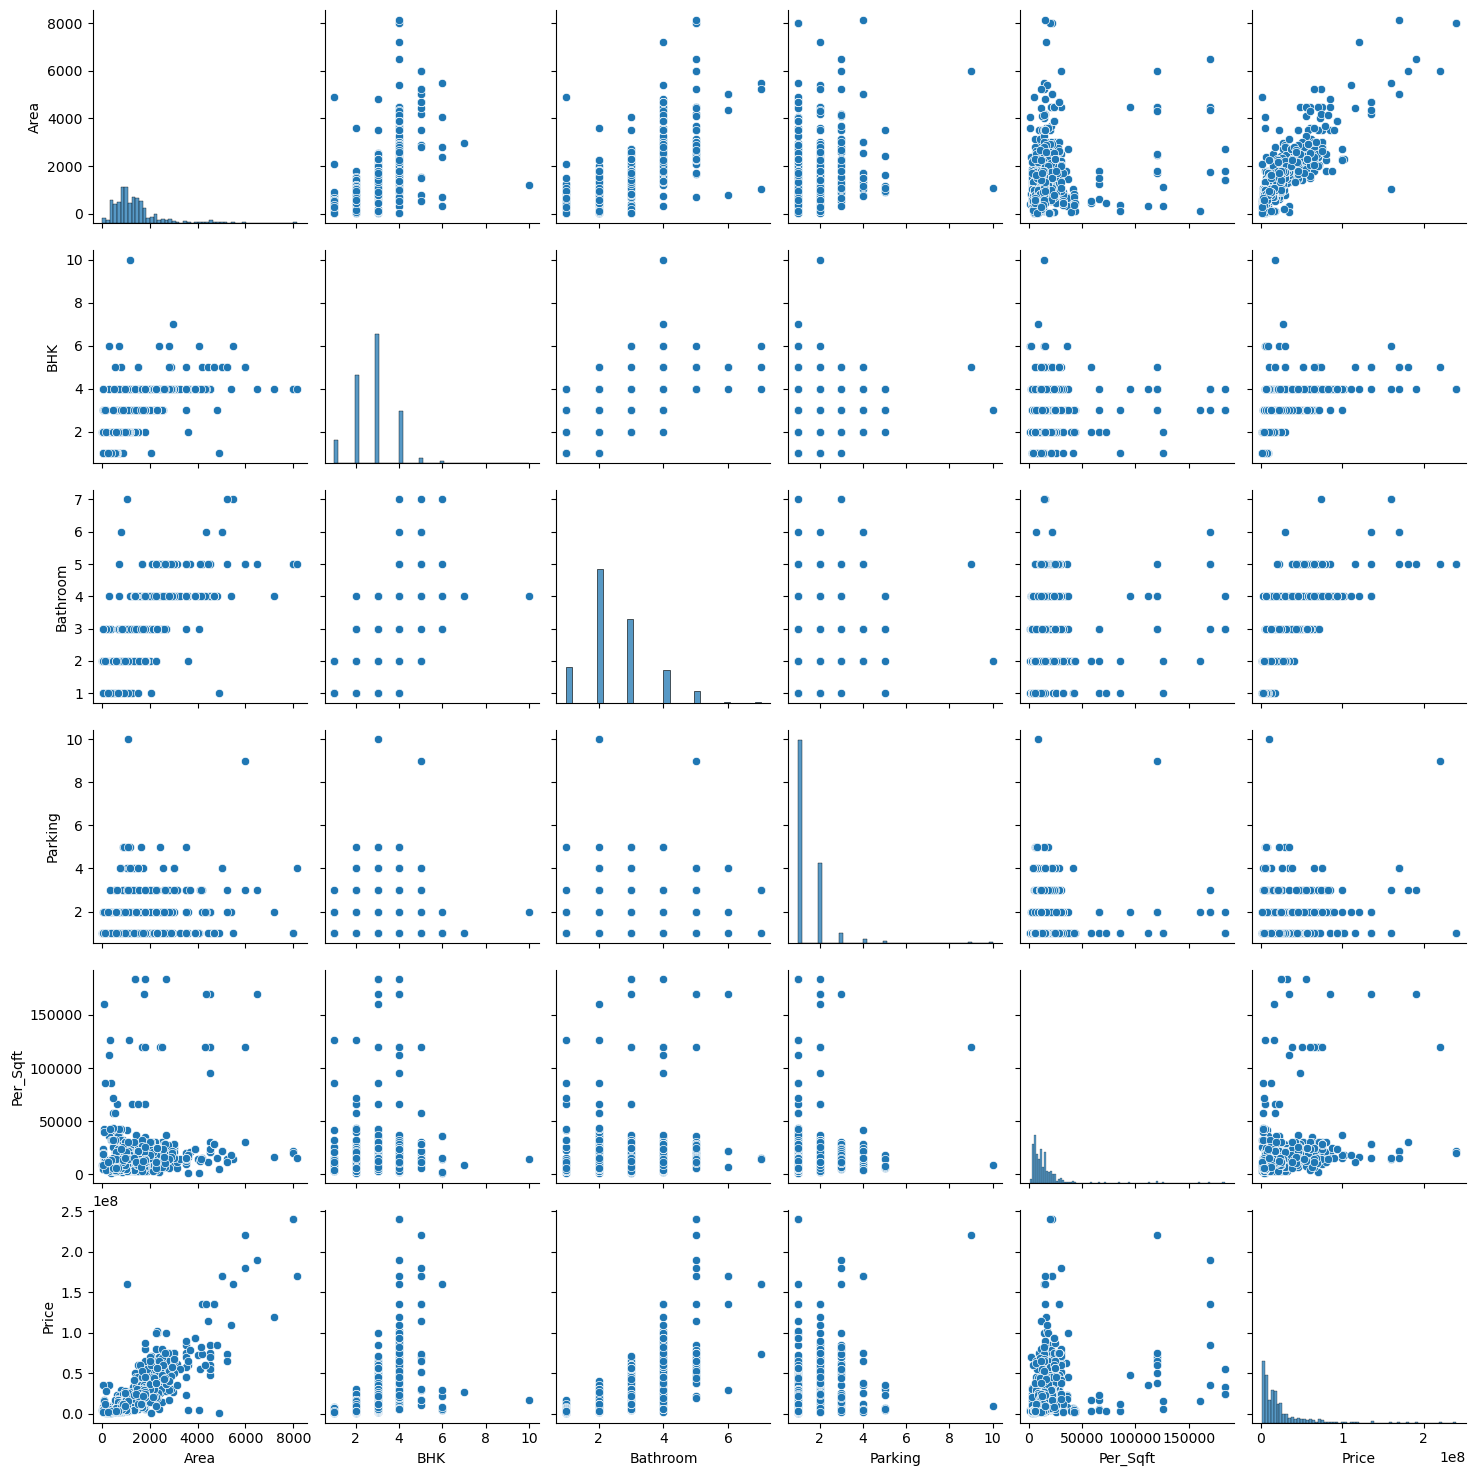

In [71]:
# multivarite analysis 
sns.pairplot(df)
plt.show()

In [76]:
df.corr(numeric_only=True)

,Area,BHK,Bathroom,Parking,Per_Sqft,Price
Area,1.000000,0.651160,0.740293,0.324508,0.257313,0.847225
BHK,0.651160,1.000000,0.767598,0.232556,0.175552,0.559619
Bathroom,0.740293,0.767598,1.000000,0.325204,0.230032,0.724435
Parking,0.324508,0.232556,0.325204,1.000000,0.166187,0.355349
Per_Sqft,0.257313,0.175552,0.230032,0.166187,1.000000,0.338885
Price,0.847225,0.559619,0.724435,0.355349,0.338885,1.000000


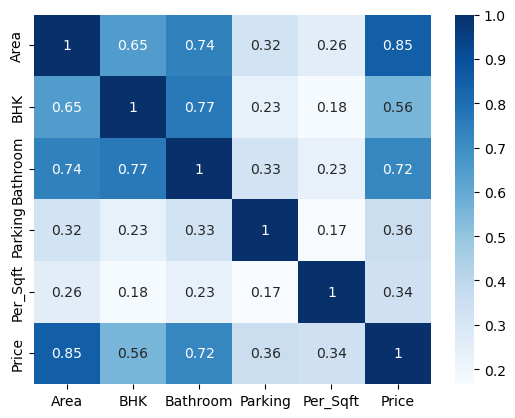

In [78]:
# corr
# heatmap
sns.heatmap(df.corr(numeric_only=True),cmap='Blues',annot=True)
plt.show()

The heatmap reveals how different real estate features relate to property price:

**Highly Correlated with Price:**
- Area (0.85): Strongest predictor of price.
- Bathroom (0.72): Indicates property luxury and size.
- BHK (0.56): Moderately influential.

**Feature Relationships:**
- Bathroom & BHK (0.77) and Bathroom & Area (0.74): These features scale together, reflecting property size and layout.
**Weak Correlations:**
- Parking (0.36) and Per_Sqft (0.34): Minimal impact on price, suggesting external factors may influence them.

In [79]:
cat

['Furnishing',
 'Location',
 'District',
 'Locality',
 'Status',
 'Transaction',
 'Type']

In [82]:
df.District.value_counts().reset_index()

,District,count
0,South Delhi,457
1,West Delhi,150
2,East Delhi,135
3,North West Delhi,122
4,South West Delhi,95
5,South West Delhi,87
6,Shahdara,75
7,South East Delhi,59
8,Central Delhi,32


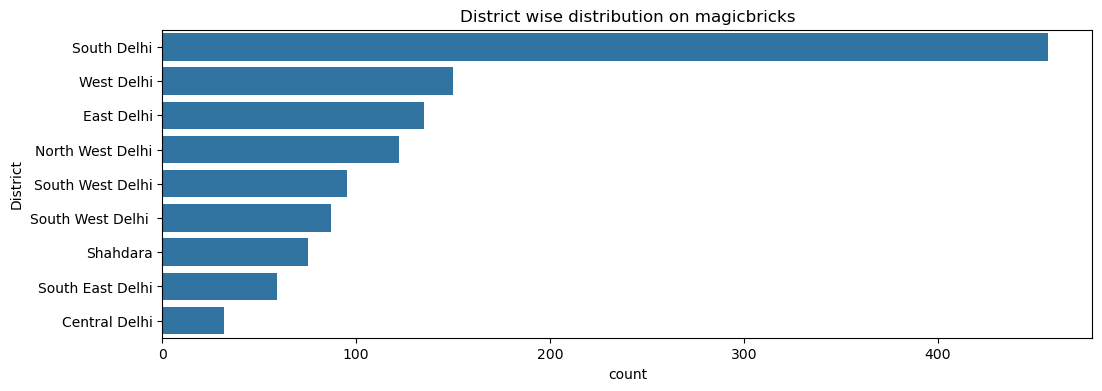

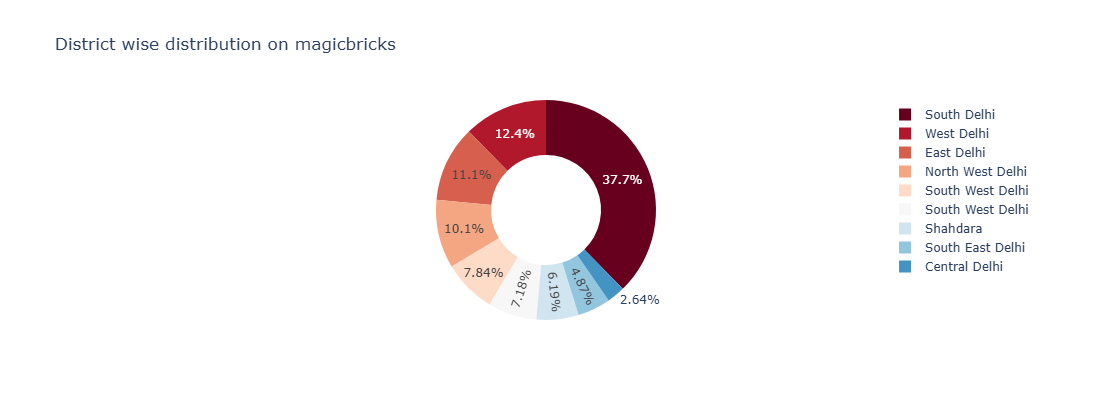

,District,count
0,South Delhi,457
1,West Delhi,150
2,East Delhi,135
3,North West Delhi,122
4,South West Delhi,95
5,South West Delhi,87
6,Shahdara,75
7,South East Delhi,59
8,Central Delhi,32


In [92]:
temp = df.District.value_counts().reset_index()
plt.figure(figsize=(12,4))
sns.countplot(data=df,y='District',order=temp.District)
plt.title('District wise distribution on magicbricks')
plt.show()

px.pie(temp,values='count',names='District',height=400,
        color_discrete_sequence=px.colors.sequential.RdBu,hole=0.5,
        title='District wise distribution on magicbricks').show()
temp

In [93]:
# location 
# price
# bivariate
df.loc[:,['Location','Price']].sample(5)

,Location,Price
795,Moti Nagar,14200000
693,Vasant Kunj,20000000
957,Alaknanda,19000000
67,Shahdara,6500000
756,Dwarka,2400000


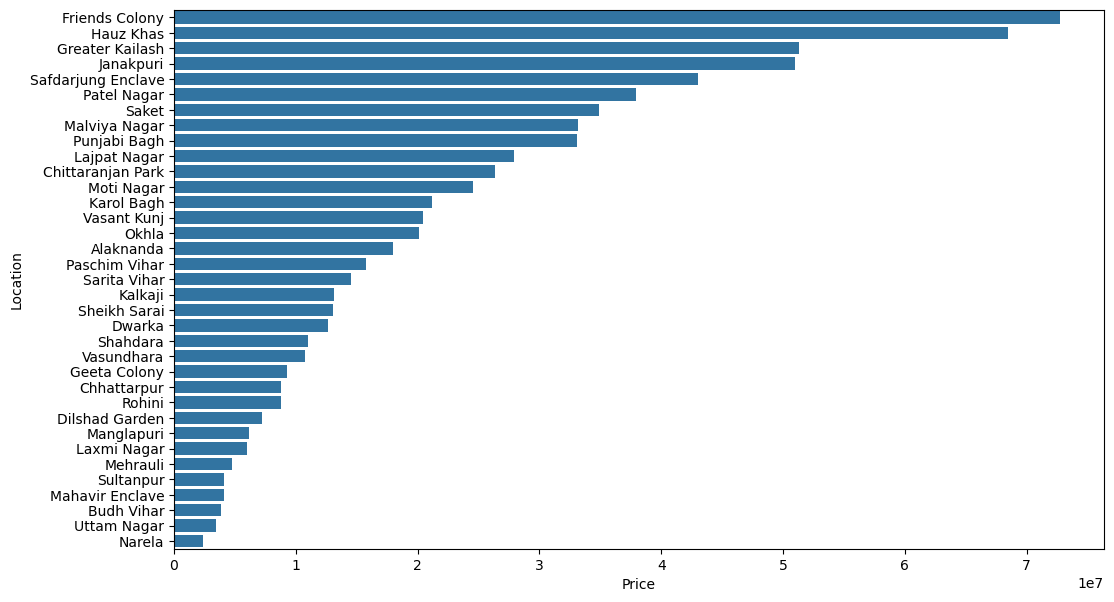

In [94]:
temp = df.groupby('Location')['Price'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,7))
sns.barplot(data=df,y='Location',x='Price',ci=False,order=temp.Location)
plt.show()

## Property Price Insights by Location
- Premium Localities:
Friends Colony, Hauz Khas, and Greater Kailash top the chart with the highest property prices, indicating their status as upscale, well-developed neighborhoods favored for luxury living and investment.
- Mid-Tier Zones:
Areas like Patel Nagar, Saket, and Malviya Nagar show moderate pricing, suggesting balanced demand and accessibility—ideal for middle-income buyers seeking urban convenience.
- Affordable Segments:
Narela, Uttam Nagar, Budh Vihar, and Mahavir Enclave reflect the lowest property prices, positioning them as budget-friendly options, likely with developing infrastructure and emerging residential appeal.
- Investment Implication:
The wide price disparity across locations highlights strategic opportunities for both premium investments and affordable housing development, depending on buyer goals and urban growth trends.

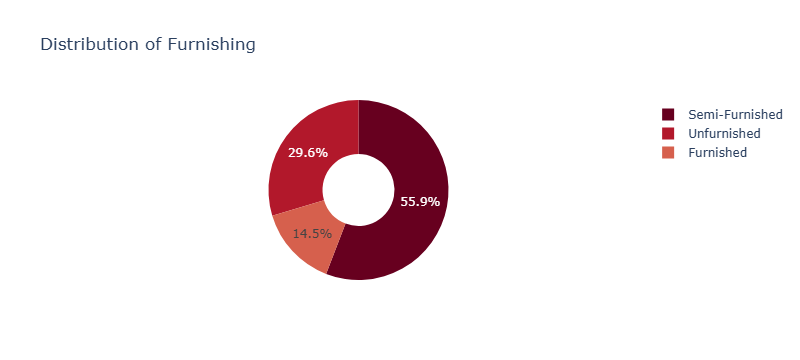

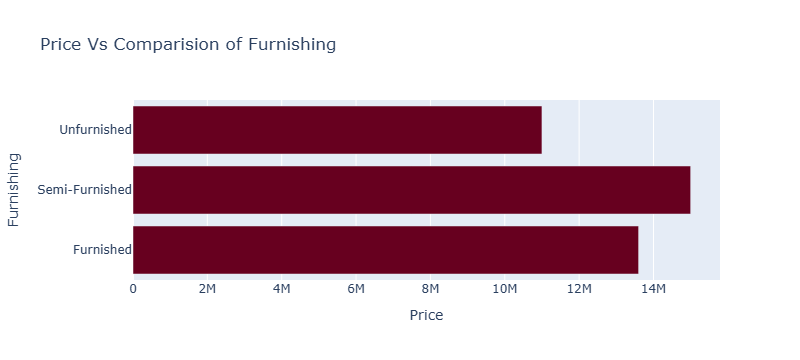

In [99]:
temp = df.Furnishing.value_counts().reset_index()

px.pie(temp,names='Furnishing',values='count',title='Distribution of Furnishing',hole=0.4,
       color_discrete_sequence=px.colors.sequential.RdBu).show()

temp2 = df.groupby('Furnishing')['Price'].median().reset_index()

px.bar(temp2,x='Price',y='Furnishing',title='Price Vs Comparision of Furnishing',color_discrete_sequence=px.colors.sequential.RdBu).show()

## Property Price Insights by Furnishing Status
- Semi-Furnished Leads in Value  
Properties labeled as Semi-Furnished command the highest average price, suggesting a strong buyer preference for partial readiness without full customization costs.
- Furnished Homes Rank Second  
Furnished properties are priced slightly lower than semi-furnished ones, indicating that while convenience is valued, buyers may not always pay a premium for fully furnished setups.
- Unfurnished Properties Are Least Expensive  
Unfurnished homes show the lowest price range, making them attractive for budget-conscious buyers or investors seeking flexibility in interior design.
- Market Implication  
The pricing trend highlights that moderate furnishing strikes the best balance between cost and buyer appeal, offering developers and sellers a strategic edge in mid-tier segments.

In [100]:
df.Transaction.value_counts()

Transaction
Resale          746
New_Property    466
Name: count, dtype: int64

<Axes: xlabel='Transaction', ylabel='count'>

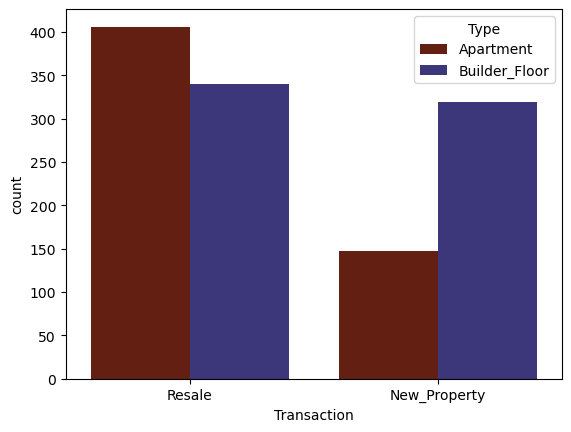

In [103]:
colors = ['#701705','#312C85']
sns.countplot(data=df,x='Transaction',hue='Type',palette=colors)

# 🏘️Property Transaction Insights by Type
- *Apartments Dominate Resale Market*  
Resale transactions are more frequent for Apartments, with counts exceeding 400, indicating strong secondary market activity and buyer preference for established units.
- *Builder Floors Lead in New Properties*  
Builder_Floor properties show higher counts in New_Property transactions, suggesting they are more commonly developed and sold as fresh inventory.
- *Segmented Demand Patterns*  
The chart highlights a clear split: Apartments are favored for resale, while Builder_Floors drive new property listings—reflecting distinct buyer and developer strategies across transaction types.